<a href="https://colab.research.google.com/github/michelucci/zhaw-dlcourse-spring2019/blob/master/Week%202%20-%20Calculus%20and%20Data%20Visualisation/Week_2_Gradient_Descent_examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Networks and Deep Learning for Life Sciences and Health Applications - An introductory course about theoretical fundamentals, case studies and implementations in python and tensorflow

(C) Umberto Michelucci 2018 - umberto.michelucci@gmail.com

github repository: https://github.com/michelucci/zhaw-dlcourse-spring2019

Spring Semester 2019

# Import and settings

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# GD Tutorial

Let's consider an easy function

$$
f(x) = x^2 
$$

This function has just one minimum at $x=0$. 

In [0]:
def f(x):
  return np.array(x**2)

def df(x):
  return np.array(2*x)

def f2(x):
  return x**2/(1.0+0.5*x**2) 

def df2(x):
  return 8.0*x/(x**2+2)**2

In [0]:
x = np.arange(-3,3,0.05)

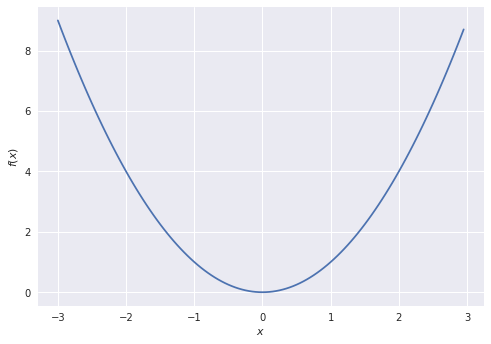

In [30]:
plt.plot(x,f(x))
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.show()

Let's use the GD to try to find the minimum. To visualise the algorithm let's memorize the iterations and plot the points on the function to see what happens when varying the learning rate.

## Gradient Descent implementation

In [0]:
# f is the function of which we want to find the minimum
# df is the derivative of the function f
# x0 is the initial guess
# gamma is the learning rate
# nit is the number of iterations we want to evaluate
def GD(f,df, x0, gamma, nit):
  approximations = [x0] # This list will contain the x_i approximations
  for i in range(1,nit):
    xi = approximations[i-1]-gamma * df(approximations[i-1])
    approximations.append(xi)
    
  return np.array(approximations)

# GD with different learning rates

In [0]:
approx1 = GD(f,df,-2, 0.1, 10)
approx2 = GD(f,df,-2, 0.05, 10)
approx3 = GD(f,df,-2, 0.3, 10)

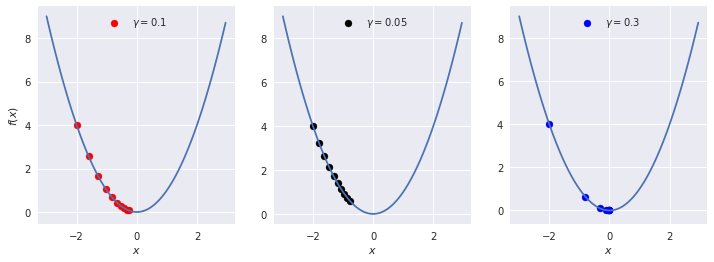

In [46]:
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(1,3,1)
ax1.plot(x,f(x))
ax1.scatter(approx1, f(approx1), color = 'red', label = '$\gamma = 0.1$')
ax1.set_xlabel('$x$')
ax1.set_ylabel('$f(x)$')
plt.legend()


ax2 = fig.add_subplot(1,3,2)
ax2.plot(x,f(x))
ax2.scatter(approx2, f(approx2), color = 'black', label = '$\gamma = 0.05$')
ax2.set_xlabel('$x$')
plt.legend()

ax3 = fig.add_subplot(1,3,3)
ax3.plot(x,f(x))
ax3.scatter(approx3, f(approx3), color = 'blue', label = '$\gamma = 0.3$')
ax3.set_xlabel('$x$')

plt.legend()
plt.show()

# Very small and very big learning rate

In [0]:
approx3 = GD(f,df,-2, 0.01, 10)
approx4 = GD(f,df,-2, 1.1, 10)

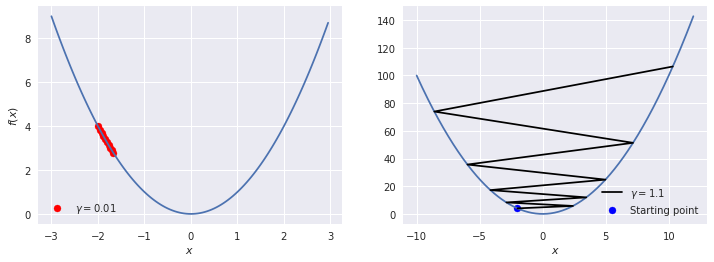

In [67]:
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(1,2,1)
ax1.plot(x,f(x))
ax1.scatter(approx3, f(approx3), color = 'red', label = '$\gamma = 0.01$')
ax1.set_xlabel('$x$')
ax1.set_ylabel('$f(x)$')
plt.legend()


xtemp = np.arange(-10,12,0.05)
ax2 = fig.add_subplot(1,2,2)
ax2.scatter(-2, f(-2), color = 'blue', label = 'Starting point')
ax2.plot(xtemp,f(xtemp))
ax2.plot(approx4, f(approx4),  color = 'black', label = '$\gamma = 1.1$', )
ax2.set_xlabel('$x$')
plt.legend(loc = 'lower right')


plt.show()

# Vanishing gradients problem

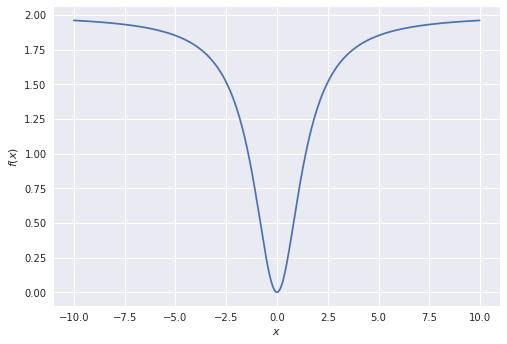

In [72]:
x2 = np.arange (-10,10,0.02)
plt.plot(x2,f2(x2))
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.show()

In [0]:
approx6 = GD(f2,df2,-2, 0.1, 10)
approx7 = GD(f2,df2,-2, 0.05, 10)
approx8 = GD(f2,df2,-2, 0.3, 10)

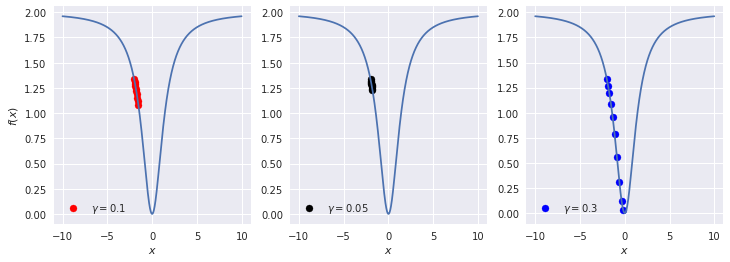

In [92]:
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(1,3,1)
ax1.plot(x2,f2(x2))
ax1.scatter(approx6, f2(approx6), color = 'red', label = '$\gamma = 0.1$')
ax1.set_xlabel('$x$')
ax1.set_ylabel('$f(x)$')
plt.legend()


ax2 = fig.add_subplot(1,3,2)
ax2.plot(x2,f2(x2))
ax2.scatter(approx7, f2(approx7), color = 'black', label = '$\gamma = 0.05$')
ax2.set_xlabel('$x$')
plt.legend()

ax3 = fig.add_subplot(1,3,3)
ax3.plot(x2,f2(x2))
ax3.scatter(approx8, f2(approx8), color = 'blue', label = '$\gamma = 0.3$')
ax3.set_xlabel('$x$')

plt.legend()
plt.show()

In [0]:
approx9 = GD(f2,df2,-20, 0.3, 10)

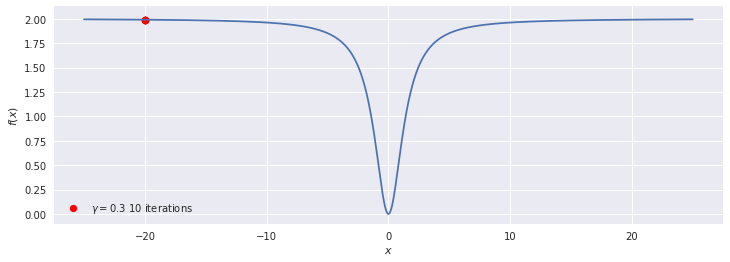

In [83]:
x3 = np.arange(-25,25,0.01)

fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(1,1,1)
ax1.plot(x3,f2(x3))
ax1.scatter(approx9, f2(approx9), color = 'red', 
            label = '$\gamma = 0.3$ 10 iterations')
ax1.set_xlabel('$x$')
ax1.set_ylabel('$f(x)$')
plt.legend()

In [0]:
approx10 = GD(f2,df2,-20, 0.3, 100)

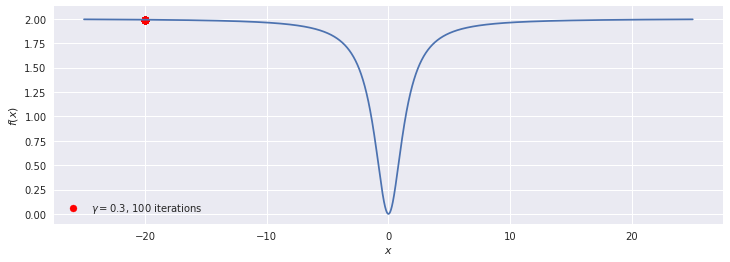

In [82]:
x3 = np.arange(-25,25,0.01)

fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(1,1,1)
ax1.plot(x3,f2(x3))
ax1.scatter(approx10, f2(approx10), color = 'red', 
            label = '$\gamma = 0.3$, 100 iterations')
ax1.set_xlabel('$x$')
ax1.set_ylabel('$f(x)$')
plt.legend()

In [84]:
df2(-20)

-0.0009900745031063587

In [0]:
approx11 = GD(f2,df2,-20, 5.0, 100)

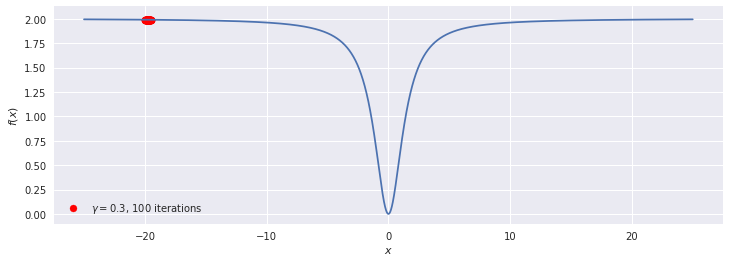

In [88]:
x3 = np.arange(-25,25,0.01)

fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(1,1,1)
ax1.plot(x3,f2(x3))
ax1.scatter(approx11, f2(approx11), color = 'red', 
            label = '$\gamma = 0.3$, 100 iterations')
ax1.set_xlabel('$x$')
ax1.set_ylabel('$f(x)$')
plt.legend()

# How to find out if we have this problem without plotting the function

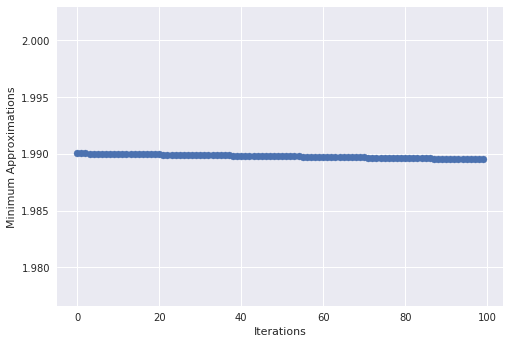

In [129]:
plt.scatter(np.arange(0,100), f2(approx11))
plt.xlabel('Iterations')
plt.ylabel('Minimum Approximations')
plt.show()

In [0]:
approx8_ = GD(f2,df2,-2, 0.3, 30)

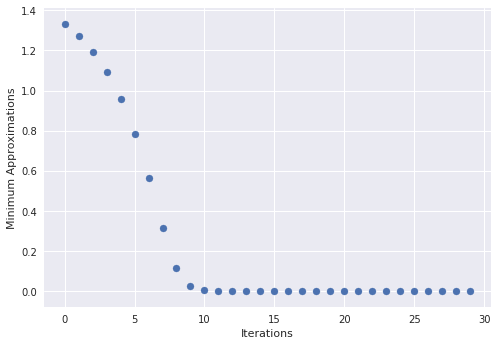

In [138]:
plt.scatter(np.arange(0,30), f2(approx8_))
plt.xlabel('Iterations')
plt.ylabel('Minimum Approximations')
plt.show()

# Exercises

## Exercise 1 - Difficulty FUN

Rewrite the GD algorithm (taking as a start the one provided) and write to be able to reduce the learning rate with the number of iterations. 

The goal is to take ```f2``` and try to develop an algorithm (let's call it GD2) that is able to find the minimum.

Start with $x_0=-20$.
You should start with quite a big $\gamma$ at the beginning to escape from the flat part of the function, and then as soon as you get closer to the minimum you should reduce the learning rate to be able to get to the minimum as efficiently as possible.

As a hint you could consider the following function for the learning rate

In [0]:
def learning_rate(iteration):
  if (iteration < 100):
    return 30.0
  elif (iteration >= 100):
    return 0.1

And you should use this function in your GD2 function.

**Note**: you need to fine tune the parameters of the function. Maybe 100 is not the right value, and 30 may need some tuning. Possibly you may need more than just two steps in the function.

## Exercise 2 - Difficulty Easy

Take ```f2``` and find the best learning rate that will get you the best approximation of the minimum within 5 iterations. 

If you consider up to 100 iterations what is the learning rate that gives you the best approximation of the minimum?

## Exercise 3 - Difficulty Medium

Consider the function

$$
g(x) = 1+2x+3x^2
$$

that has a minimum at $x=-1/3$. 

Using the GD algorithm as we have done before, find this minimum.
You will need to define

- A Python function g that returns the values of the function
- A python function dg that returns the values of the derivative. As a help the derivative of the function $g$ is

$$
\frac{dg}{dx} = 2+6x
$$

As a starting point you can choose any value you please. See what happens when changing the starting value. Do you get to the minimum with the same number of iterations? 

**Bonus question**: what is the maximum value of the learning rate for which the algorithm stills find the minimum and does not diverge?